# Mask R-CNN Baseline for Inference

[Reference_code](https://www.analyticsvidhya.com/blog/2019/07/computer-vision-implementing-mask-r-cnn-image-segmentation/#h2_6)


## Setting

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip uninstall keras-nightly
!pip uninstall -y tensorflow
!pip uninstall scikit-image -y 

!pip install h5py==2.10.0
!pip install tensorflow==1.15
!pip install tensorflow-gpu==1.15.0
!pip install keras==2.1.6
!pip install scikit-image==0.16.2

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Successfully uninstalled tensorflow-2.7.0
Found existing installation: scikit-image 0.18.3
Uninstalling scikit-image-0.18.3:
  Successfully uninstalled scikit-image-0.18.3
     |████████████████████████████████| 2.9 MB 28.6 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-vis 0.4.1 requires scikit-image, which is not installed.
     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 3.8 MB 59.6 MB/s 
     |████████████████████████████████| 503 kB 72.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256

In [3]:
!pip uninstall numpy -y 
!pip install "numpy<1.17"

Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Successfully uninstalled numpy-1.19.5
     |████████████████████████████████| 17.3 MB 161 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires numpy>=1.17, but you have numpy 1.16.6 which is incompatible.
tensorflow-probability 0.15.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
pywavelets 1.2.0 requires numpy>=1.17.3, but you have numpy 1.16.6 which is incompatible.
pyerfa 2.0.0.1 requires numpy>=1.17, but you have numpy 1.16.6 which is incompatible.
kapre 0.3.6 requires numpy>=1.18.5, but you have numpy 1.16.6 which is incompatible.
kapre 0.3.6 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
jaxlib 0.1.71+cuda111 requires numpy>=1.18, but you have numpy 1.16.6 which is incompatible.
jax 0.2.25 requires numpy>

In [1]:
import numpy as np
import scipy
import PIL
import cython
import matplotlib
import skimage # scikit-image
import tensorflow as tf
import keras
import cv2 # opencv_python
import h5py
import imgaug
import IPython

Using TensorFlow backend.


In [2]:
print(tf.__version__) # must = 1.15.0
print(keras.__version__) # must = 2.1.6
print(np.__version__) # must = 1.16.6

1.15.0
2.1.6
1.16.6


In [3]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Root directory of the project
# ROOT_DIR = os.path.abspath("../")
ROOT_DIR = '/content/drive/Shareddrives/스마트축사_데이터_활용_대회/Mask_RCNN'

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils

import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn import contour

# Import COCO config
# sys.path.append(os.path.join(ROOT_DIR, "samples/coco/")) # To find local version
from mrcnn import cow

%matplotlib inline

## Model

In [5]:
# Directory to save logs and trained model 
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
MODEL_PATH = os.path.join(MODEL_DIR, "cow20220121T1532/mask_rcnn_cow_0070.h5")

# # Download COCO trained weights from Releases if needed
# if not os.path.exists(MODEL_PATH):
#     utils.download_trained_weights(MODEL_PATH)

In [6]:
class InferenceConfig(cow.CowConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.4

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.4
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [7]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights('/content/drive/Shareddrives/스마트축사_데이터_활용_대회/Mask_RCNN/logs/cow20220121T1532/mask_rcnn_cow_0070.h5', by_name=True)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.






Re-starting from epoch 70


## Sample_inference

In [8]:
from glob import glob
from tqdm import tqdm
target_img_paths = sorted(glob('/content/drive/Shareddrives/스마트축사_데이터_활용_대회/데이터/data/test_images/*'))

In [12]:
class_names = ['BG','anestrus','estrus']

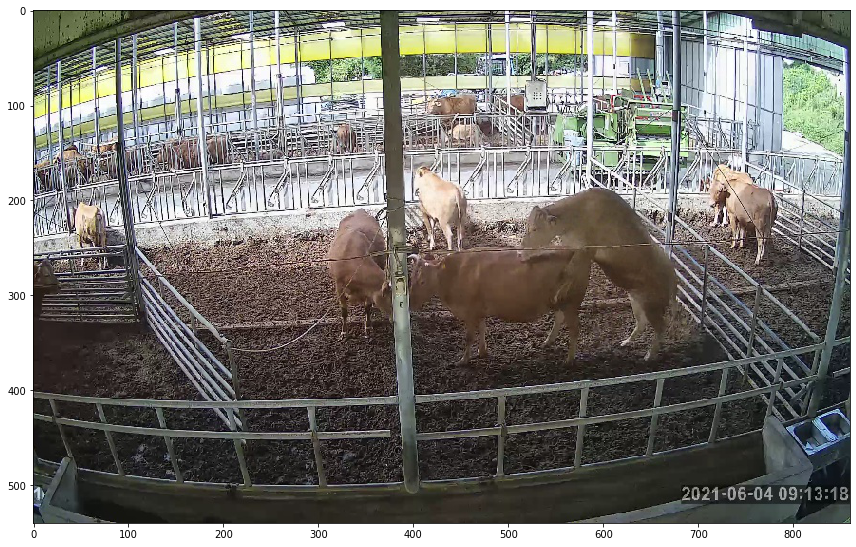

In [19]:
# Load a random image from the images folder
image = skimage.io.imread(target_img_paths[3])

# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

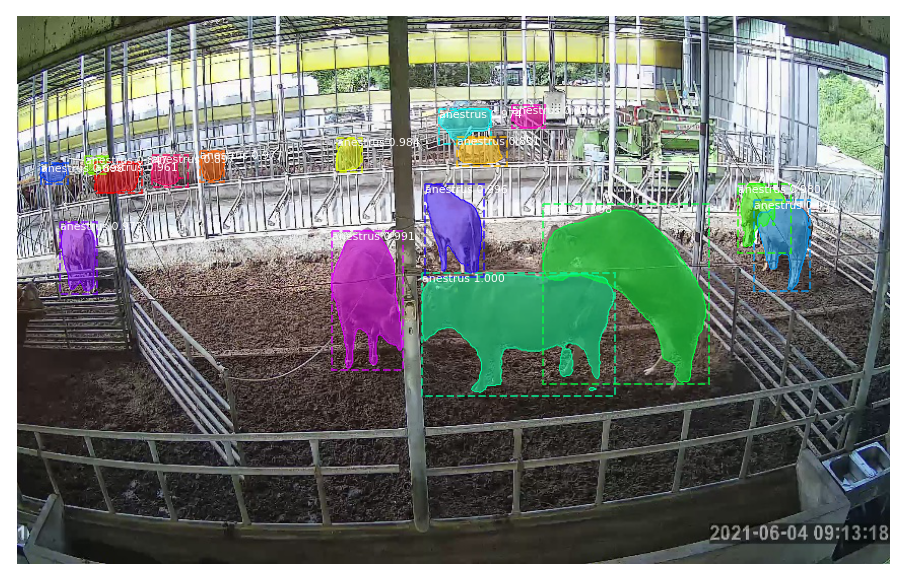

In [21]:
results = model.detect([image], verbose=0)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

## Total_inference

In [ ]:
from glob import glob
from tqdm import tqdm

# Our Class names
class_names = ['BG','anestrus','estrus']

# For Test
target_img_paths = sorted(glob('/content/drive/Shareddrives/스마트축사_데이터_활용_대회/데이터/data/test_images/*'))

In [ ]:
# Run detection
annotations = []
for image in tqdm(target_img_paths):
    # images의 id와 annotations의 image_id는 image의 file_name에 붙은 숫자와 같음.
    image_id = int(image.split('/')[-1].split('.')[0][-4:]) 
    image = skimage.io.imread(image)
    result = model.detect([image], verbose=0)

    # annotations
    r = result[0]
    image_lst = contour.get_contours(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])
    for each_object in image_lst:
        each_object['image_id'] = image_id
    annotations += image_lst

100%|██████████| 1431/1431 [22:19<00:00,  1.07it/s]


## Submit

In [ ]:
import json
submit = json.load(open('/content/drive/Shareddrives/스마트축사_데이터_활용_대회/데이터/data/test_answer_sample.json'))

In [ ]:
# float32은 json이 저장을 못해 일반 정수형으로 type 변환
new_annotations = annotations.copy()

for i, annoation in enumerate(annotations):
  new_annotations[i]['conf'] = float(annoation['conf'])

submit['annotations'] = new_annotations

In [ ]:
import datetime
nowtime = datetime.datetime.now().strftime('%m%d_%H%M')
print(nowtime) # month.day_hour.minute

# submit 파일 저장 경로
dir = '/content/drive/Shareddrives/스마트축사_데이터_활용_대회/데이터/submit/'

# 저장될 파일명: submit_월일_시간분
# ex) 현재 1월 18일 18시 1분: submit_0118_1801.json으로 저장
with open(dir + 'submit_{}.json'.format(nowtime),'w') as f:
  json.dump(submit, f)

0122_0930


## Validation

In [ ]:
import json
val_json = json.load(open('/content/drive/Shareddrives/스마트축사_데이터_활용_대회/확인용데이터_채은/val/val_answer.json'))

In [ ]:
# float32은 json이 저장을 못해 일반 정수형으로 type 변환
new_annotations = annotations.copy()

for i, annoation in enumerate(annotations):
  new_annotations[i]['conf'] = float(annoation['conf'])

val_json['annotations'] = new_annotations

In [ ]:
with open('/content/drive/Shareddrives/스마트축사_데이터_활용_대회/신형/val_90_aug_rotate_fliplr_nms_0.8.json','w') as f:
  json.dump(val_json, f)